In [1]:
import ugradio

No module named 'rtlsdr'


In [3]:
ugradio.leusch.ALT_MIN
ugradio.leusch.ALT_MAX

85.0

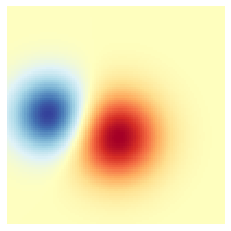

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))


# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights = (np.outer(gauss_y_high, gauss_x_high)
           - np.outer(gauss_y_low, gauss_x_low))

# We'll also create a grey background into which the pixels will fade
greys = np.full((*weights.shape, 3), 70, dtype=np.uint8)

# First we'll plot these blobs using ``imshow`` without transparency.
vmax = np.abs(weights).max()
imshow_kwargs = {
    'vmax': vmax,
    'vmin': -vmax,
    'cmap': 'RdYlBu',
    'extent': (xmin, xmax, ymin, ymax),
}

fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, **imshow_kwargs)
ax.set_axis_off()

In [5]:
# Create an alpha channel of linearly increasing values moving to the right.
alphas = np.ones(weights.shape)
alphas[:, 30:] = np.linspace(1, 0, 70)

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, alpha=alphas, **imshow_kwargs)
ax.set_axis_off()

ValueError: operands could not be broadcast together with shapes (218,218) (100,100) 

<Figure size 432x288 with 1 Axes>

In [4]:
# Create an alpha channel based on weight values
# Any value whose absolute value is > .0001 will have zero transparency
alphas = Normalize(0, .3, clip=True)(np.abs(weights))
alphas = np.clip(alphas, .4, 1)  # alpha value clipped at the bottom at .4

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, alpha=alphas, **imshow_kwargs)

# Add contour lines to further highlight different levels.
ax.contour(weights[::-1], levels=[-.1, .1], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

ax.contour(weights[::-1], levels=[-.0001, .0001], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

ValueError: operands could not be broadcast together with shapes (217,217) (100,100) 

<Figure size 432x288 with 1 Axes>